In [ ]:
import keras 
from keras.models import Sequential #whether you create ann,cnn,nn,rnn u have to import this because it is responsible for creating nn
from keras.layers import Dense # 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout#regulariztion aparameter
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 


**This is the dataset from bank , to predict whether the customer will exit the bank in future or not , so that the bank can not leave them they can hold by providing some benefitial**

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# I dont want row no cust ID and sur name bcz they are not going to play a role , here 
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=False)#drop first is the no of columns u want , if it is false , it will take column= no of categories , if it is true it will take column= no of categories - 1
gender=pd.get_dummies(x['Gender'],drop_first=True)# her ewe have m / f , so turning to 1 column , this drop_first true means it will reduce the column ie 2 categories to 1 

In [ ]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [ ]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [ ]:
## Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)


In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# now we do feature scaling because , to reudce computation 
# the feature value are higher and so we reduvce to one commone scale 
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Initialising the ANN
classifier = Sequential()# this is empty NN currently

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))
## first hidden layer 
# units=10 is the no of hidden unit in first hidden layer 
#kernel_initializer= 'he_uniform' it is the weight initialization - root of 6/fan_in
# no of input_dim = 12 ie 12 features 


In [ ]:
# Adding the second and third hidden layer
classifier.add(Dense(units=15, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=15, kernel_initializer='he_uniform',activation='relu'))
# no of hidden unit in 2nd and 3rd layer is 15

In [ ]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
# so here the weight initilization changes to glorotuniform or xavier ie init= 'he_uniform' it is the weight initialization - root of 6/fan_in+fan_out
#no of output unit is 1 


In [ ]:
#summary 
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_17 (Dense)             (None, 15)                165       
_________________________________________________________________
dense_18 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 16        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#prefer using binary_crossentropy if you use sigmoid in o/p unit oor if hte o/p is binary categorical 
# if u have more than one category then prefer using " CATEGORICAL_CROSSENTROPY"

In [ ]:
#Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 70)

Epoch 1/70
536/536 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7677 - val_loss: 0.4645 - val_accuracy: 0.7970
Epoch 2/70
536/536 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.8084 - val_loss: 0.4424 - val_accuracy: 0.7997
Epoch 3/70
536/536 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8108 - val_loss: 0.4231 - val_accuracy: 0.8073
Epoch 4/70
536/536 [==============================] - 1s 2ms/step - loss: 0.4015 - accuracy: 0.8188 - val_loss: 0.4093 - val_accuracy: 0.8126
Epoch 5/70
536/536 [==============================] - 1s 1ms/step - loss: 0.3881 - accuracy: 0.8265 - val_loss: 0.3999 - val_accuracy: 0.8183
Epoch 6/70
536/536 [==============================] - 1s 1ms/step - loss: 0.3789 - accuracy: 0.8358 - val_loss: 0.3961 - val_accuracy: 0.8209
Epoch 7/70
536/536 [==============================] - 1s 1ms/step - loss: 0.3714 - accuracy: 0.8369 - val_loss: 0.3915 - val_accuracy: 0.8258
Epoch 

ONE EPOCH IS ONE FULL ACCESS TO DATA POINTS 
SO 
IN ONE EPOCH , 10 DATA POINTS ARE SELECTED AND COMPUTED LOSS AND BACKPROB TO REDUCE THEN ANOTHER 10 IS SELECTED COMPUTED LOSS AND REDUCE IT 
UNTILL ALL THE DATA POINT ARE ACCESSED 

In [ ]:
# HERE YOU CAN SEE IT HAS LOW BIAS AND HIGH VARIANCE 
# BIAS = ERROR IS TRAIN DATA 
# VARIANCE = ERROR IN TEST DATA 
# SO BY SEEING THE VAL_LOSS AND LOSS , WE CAN SAY THE MODEL IS OVER FITTING , 
# SINCE IT DOESN'T PERFORM WELL IN OUR TEST DATA


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[0.24279138],
       [0.20511547],
       [0.1515708 ],
       ...,
       [0.0975309 ],
       [0.31092882],
       [0.17894769]], dtype=float32)

In [ ]:
# so we use sigmoid the y_pred will be 0 - 1 
# i use one condition to know it is 0 or 1 
y_pred=y_pred>0.5 # true if > 0.5 else false 
# so true means 1 false means 0 


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score  # the accuracy is 0.85 but we can try to increase it 

0.85

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


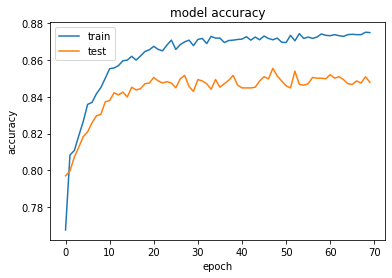

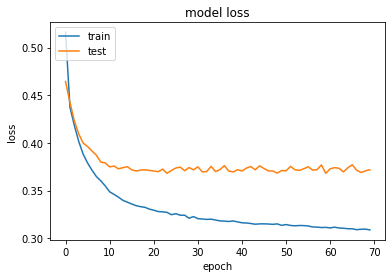

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()